# Математическая статистика. Лабораторная работа №3. Васильев Н. А.

Предположим закон распределения ёмкости аккумулятора мобильных телефонов. Для начала посторим гистограмму.

Downloading...
From: https://drive.google.com/uc?id=1O4rFr9xg9aFmkjx4-hl_XOc5O9q65_EW
To: /content/mobile_phones
100%|██████████| 122k/122k [00:00<00:00, 72.5MB/s]


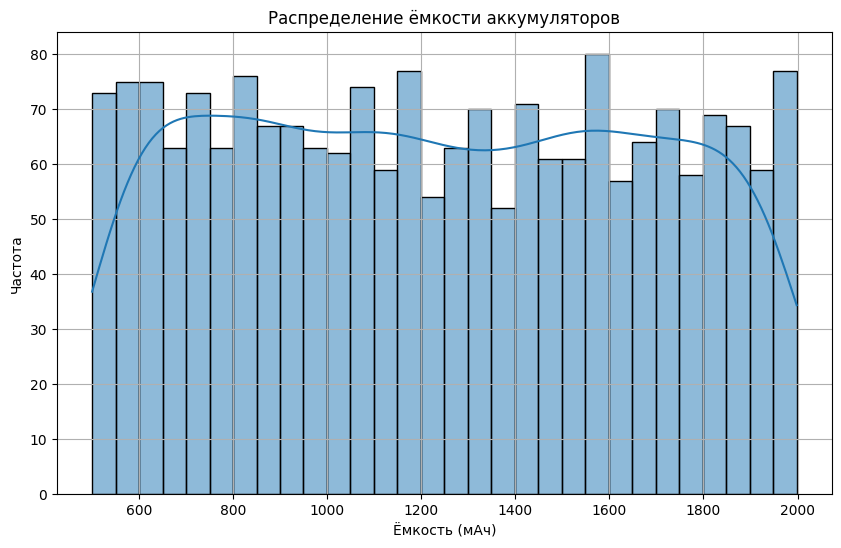

In [2]:
!pip install -q gdown
import gdown
import matplotlib.pyplot as plt
import seaborn as sns

file_id = "1O4rFr9xg9aFmkjx4-hl_XOc5O9q65_EW"
file = "mobile_phones"

gdown.download(f"https://drive.google.com/uc?id={file_id}", file, quiet=False)

import pandas as pd
df = pd.read_csv(file)
df.head()

plt.figure(figsize=(10, 6))
sns.histplot(df['battery_power'], kde=True, bins=30)
plt.title('Распределение ёмкости аккумуляторов')
plt.xlabel('Ёмкость (мАч)')
plt.ylabel('Частота')
plt.grid()
plt.show()

Проверим, можно ли предположить равномерное распределение. Для этого рассчитаем параметры равномерного распределения.

Минимальное значение:
$$
a = \min(x_1, x_2, \dotsc, x_n)
$$

Максимальное значение:
$$
b = \max(x_1, x_2, \dotsc, x_n)
$$

Таким образом, предполагаем, что исследуемая величина равномерно распределена на интервале \\([a, b]\\).

In [7]:
min_power = df['battery_power'].min()
max_power = df['battery_power'].max()
print(f'Минимум: {min_power:.2f}, Максимум: {max_power:.2f}')

Минимум: 501.00, Максимум: 1998.00


Ёмкость аккумуляторов обычно измеряется в мАч, часто целыми числами, но на практике можно считать это **абсолютно непрерывной величиной**, потому что возможны любые значения при производстве и замерах.

Поэтому мы считаем распределение абсолютно непрерывным и применяем критерий согласия Колмогорова:

$$
D = \sup_x \left| F_n(x) - F(x) \right|
$$
где:
- \\( \bar{x} \\) — выборочное среднее,
- \\( s \\) — выборочное стандартное отклонение,
- \\( F_n(x) \\) — эмпирическая функция распределения,
- \\( F(x) \\) — функция нормального распределения \\( \mathcal{N}(\bar{x}, s^2) \\),
- \\( \sup \\) — супремум (наибольшее значение разности по всем \( x \)).

In [14]:
import scipy.stats as stats
D, p_value = stats.kstest(df['battery_power'], 'uniform', args=(min_power, max_power - min_power))

print(f"Статистика D: {D:.4f}")
print(f"P-значение: {p_value:.4f}")

alpha = 0.05
if p_value > alpha:
    print("Данные соответствуют равномерному распределению")
else:
    print("Данные НЕ соответствуют равномерному распределению")

Статистика D: 0.0208
P-значение: 0.3493
Данные соответствуют равномерному распределению


На основании предварительного анализа гистограммы было выдвинуто предположение о равномерном распределении ёмкости аккумуляторов, что и проверено с помощью критерия Колмогорова.

Чтобы проверить распределение ёмкости аккумулятора у поддерживающих и не поддерживающих Wi-Fi, разделим данные на устройства с поддержкой Wi-Fi и без него и проверим, отличаются ли распределения, сначала проверяем равенство дисперсий (f-тест), потом проверяем равенство средних (t-тест, с учётом равенства/неравенства дисперсий) и применим критерий Смирнова для распределений.

**F-тест** — проверка равенства дисперсий:
$$
F = \frac{s_1^2}{s_2^2}
$$
где \\( s_1^2 \\) и \\( s_2^2 \\) — выборочные дисперсии двух групп.

**T-тест** — проверка равенства средних значений:
$$
t = \frac{\bar{x}_1 - \bar{x}_2}{\sqrt{s_p^2 \left( \frac{1}{n_1} + \frac{1}{n_2} \right)}}
$$
если дисперсии равны, или Welch's t-test, если не равны.

**Критерий Смирнова** — проверка равенства распределений:
$$
D = \sup_x \left| F_{n1}(x) - F_{n2}(x) \right|
$$
где \\( F_{n1}(x) \\) и \\( F_{n2}(x) \\) — эмпирические функции распределения для двух групп.


F-статистика: 0.9703
P-значение F-теста: 0.6332
T-статистика: -0.3729
P-значение T-теста: 0.7092
Статистика KS-теста: 0.0283
P-значение KS-теста: 0.8018
Распределения одинаковые


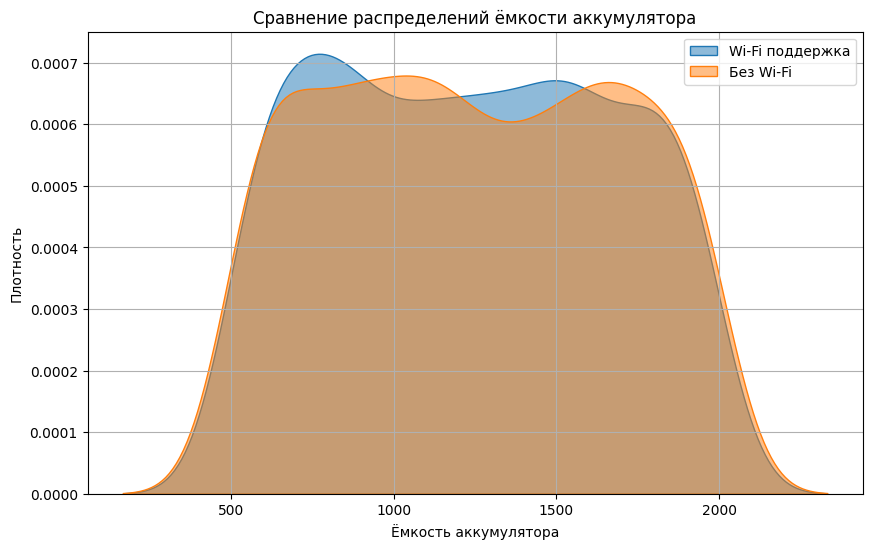

In [16]:
wifi = df[df['wifi'] == 1]['battery_power']
no_wifi = df[df['wifi'] == 0]['battery_power']

f_stat = wifi.var(ddof=1) / no_wifi.var(ddof=1)
df1 = len(wifi) - 1
df2 = len(no_wifi) - 1
p_value_f = 2 * min(stats.f.cdf(f_stat, df1, df2), 1 - stats.f.cdf(f_stat, df1, df2))

print(f"F-статистика: {f_stat:.4f}")
print(f"P-значение F-теста: {p_value_f:.4f}")

# Если p_value_f > 0.05 — можно использовать t-test assuming equal variances
# Если p_value_f <= 0.05 — используем Welch's t-test (разные дисперсии)
equal_var = p_value_f > 0.05

t_stat, p_value_t = stats.ttest_ind(wifi, no_wifi, equal_var=equal_var)

print(f"T-статистика: {t_stat:.4f}")
print(f"P-значение T-теста: {p_value_t:.4f}")

ks_stat, p_value_ks = stats.ks_2samp(wifi, no_wifi)

print(f"Статистика KS-теста: {ks_stat:.4f}")
print(f"P-значение KS-теста: {p_value_ks:.4f}")

alpha = 0.05

if p_value_ks > alpha:
    print("Распределения одинаковые")
else:
    print("Распределения различаются")

plt.figure(figsize=(10, 6))

sns.kdeplot(wifi, label='Wi-Fi поддержка', fill=True, alpha=0.5)
sns.kdeplot(no_wifi, label='Без Wi-Fi', fill=True, alpha=0.5)

plt.title('Сравнение распределений ёмкости аккумулятора')
plt.xlabel('Ёмкость аккумулятора')
plt.ylabel('Плотность')
plt.legend()
plt.grid()
plt.show()

Проверим зависимости между ёмкостью аккумулятора и ценой.

Поскольку `price_range` — это категориальная (порядковая) переменная, а `battery_power` — количественная переменная, для оценки корреляции используется **коэффициент ранговой корреляции Спирмена**.

Коэффициент Спирмена измеряет степень монотонной зависимости между двумя переменными, когда хотя бы одна из них является порядковой.

## Формула коэффициента Спирмена
Если ранжировать данные \\( x_i \\) и \\( y_i \\) и обозначить ранги через \\( R(x_i) \\) и \\( R(y_i) \\), то коэффициент Спирмена рассчитывается по формуле:

$$
r_s = 1 - \frac{6 \sum_{i=1}^n d_i^2}{n(n^2-1)}
$$

где:
- \\( d_i = R(x_i) - R(y_i) \\) — разность рангов,
- \\( n \\) — количество наблюдений.


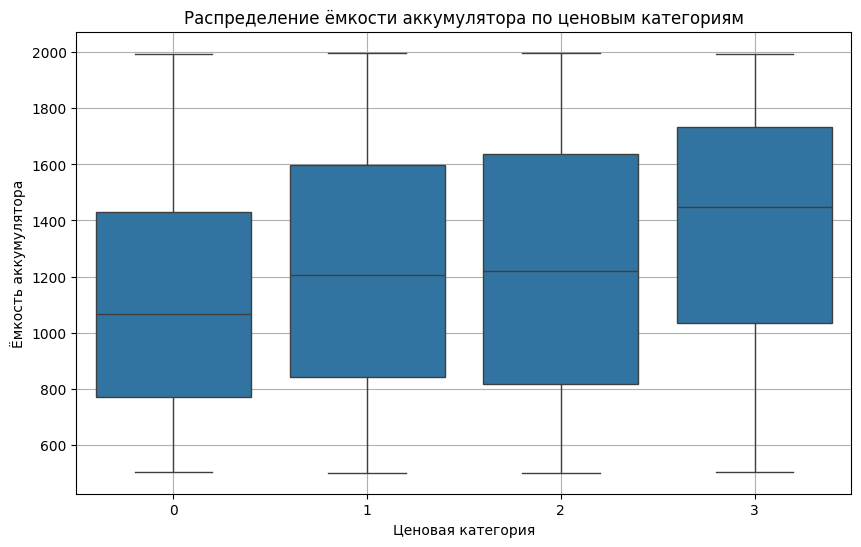

Коэффициент корреляции Спирмена: 0.2000
P-значение: 0.0000
Корреляция статистически значима
С увеличением ёмкости аккумулятора цена растет


In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='price_range', y='battery_power', data=df)
plt.title('Распределение ёмкости аккумулятора по ценовым категориям')
plt.xlabel('Ценовая категория')
plt.ylabel('Ёмкость аккумулятора')
plt.grid()
plt.show()

corr_spearman, p_value_spearman = stats.spearmanr(df['battery_power'], df['price_range'])

print(f"Коэффициент корреляции Спирмена: {corr_spearman:.4f}")
print(f"P-значение: {p_value_spearman:.4f}")

alpha = 0.05
if p_value_spearman < alpha:
    print("Корреляция статистически значима")
    if corr_spearman > 0:
        print("С увеличением ёмкости аккумулятора цена растет")
    else:
        print("С увеличением ёмкости аккумулятора цена падает")
else:
    print("Корреляция не статистически значима")